## Introduction

The Self Organizing Maps (SOM) are a type of Artificial Neural Networks able to convert complex, nonlinear statistical relationships between high-dimensional data items into simple geometric relationships on a low-dimensional display.

The figure below illustrates how we train a self-organizing map. The purple blob is the distribution of the training data. The small white disc is the current training data point drawn from that distribution. At first, the SOM nodes are arbitrarily positioned in the data space. The node (highlighted in yellow) nearest the training data point is selected. It is pulled towards the training data point. In each iteration, the nearest neighbors within a specified radius are also pulled towards this yellow node and their weights get updated. After many iterations, the grid tends to approximate the data distribution (right).

![](https://miro.medium.com/max/1020/0*dBXfz_LzfZx-2vR8)

The Euclidean distance to all weight vectors is computed when we feed the training data into the network. The neuron whose weight vector is most similar to the input is called the best matching unit (BMU). The weights of the BMU and neurons close to it in the SOM grid are adjusted towards the input vector. Once the BMU has been determined, the next step is to calculate which of the other nodes are within the BMU’s neighborhood.

- SOMs differ from other artificial neural networks because they apply competitive learning as opposed to error correlated learning, which involves backpropagation and gradient descent. 
- The training data usually has no labels and the map learns to differentiate and distinguish features based on similarities.
- SOMs are used for Visualization purposes, fraud detection among other applications

## Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-applications/Credit_Card_Applications.csv


In [2]:
!pip install MiniSom

  Preparing metadata (setup.py) ... - done
  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=a6347b52e2b3a903ec9210b4fb7c4a5b42e80f72cf67cc88cc1caa152fd53445
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built MiniSom


In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

## Load Data

In [4]:
df= pd.read_csv("../input/credit-card-applications/Credit_Card_Applications.csv")
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


SOM is an unsupervised algorithm. Hence, we need to remove Target variable from our dataframe for our analysis

In [5]:
X= df.drop("Class", axis=1)

y=df["Class"]

type(y)
# y cannot be pandas dataframe

pandas.core.series.Series

### Feature Scaling

In [6]:
# Like all Unsupervised algorithms, in SOM also we should scale our features for more accurate results
sc = MinMaxScaler(feature_range = (0,1))
sc.fit(X)
X=sc.transform(X)
type(X)
# minisom expects input in numpy array, so we will not convert X to pandas dataframe

numpy.ndarray

## Training the SOM

MiniSom is a minimalistic and Numpy based implementation of the Self Organizing Maps (SOM). <br>
This means that in order to use MiniSom, your data needs to be organized as a Numpy matrix where each row corresponds to an observation or as list of lists. <br>
Our input data X is already in numpy.ndrray format

**Parameters:** <br>
- __x, y__ : correspond to the dimensions of the SOM
- __input_len__ : number of features used in the training dataset
- __Sigma__ : is the radius of the different neighbors in the SOM. The default value for this is 1.0.
- **learning_rate** : determines how much weights are adjusted during each iteration.
- The training algorithm implemented decreases both parameters (sigma and learning_rate) as training progresses. This allows rapid initial training of the neural network that is then "fine tuned" as training progresses.
- MiniSom implements two types of training: train_random and train_batch. In __train_random__, we train the model by picking random samples from our data. In __train_batch__, the samples are picked in the order that they are stored. 
- **random_weights_init** method initializes the weights by picking random samples from the data.


In [7]:
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the Results

- **bone**: Set the colormap to 'bone'. This changes the default colormap as well as the colormap of the current image if there is one.
- **pcolor**: Create a pseudocolor plot with a non-regular rectangular grid.
- **distance_map**: Returns all mean inter-neuron distances for all winning nodes
- **colorbar**: The colorbar() function in pyplot module of matplotlib adds a colorbar to a plot indicating the color scale.
- **winner**: To obtain the position of the winning neuron on the map for a given sample

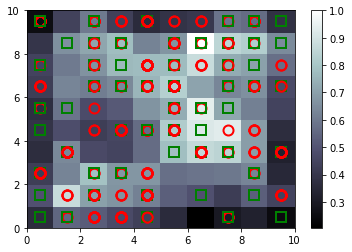

In [8]:
bone()
pcolor(som.distance_map().T) # distance map as background
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    # w[0], w[1] will place the marker at bottom left corner of the rectangle. 
    #Let us add 0.5 to both of these to plot the market at the center of the rectange.
    plot(w[0] + 0.5, 
         w[1] + 0.5,
         #Target value 0 will have marker "o" with color "r"
         #Target value 1 will have marker "s" with color "g"
         markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None', #No color fill inside markers
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the Frauds

- Our assumption is that outlier data points will have higher inter-neuron distances (IND). So let us take winning nodes with highest INDs and extract the customers in those nodes. These will be the outliers, or in our case fraudulent customers
- win_map: Creates a dictionary that indicates mapping of each winning node its customers. We will use this function to extract the list of customers in White boxes (highest IMD)

In [9]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,7)], mappings[(3,8)]), axis = 0)

### CustomerIDs of Fraudulent customers

In [10]:
#Inverse transform scaled values
frauds_orig = sc.inverse_transform(frauds)
frauds_orig= frauds_orig[:,0].astype("int64")
frauds_orig

array([15571121, 15660390, 15577515, 15705343, 15657778, 15652658,
       15624595, 15688264, 15746258, 15644878, 15671987, 15700511,
       15687688, 15638610, 15649160, 15621244, 15632789, 15567834,
       15591035, 15608804, 15572361])

References:
- https://github.com/JustGlowing/minisom
- https://glowingpython.blogspot.com/2013/09/self-organizing-maps.html
- https://heartbeat.comet.ml/introduction-to-self-organizing-maps-soms-98e88b568f5d
- https://www.udemy.com/course/deeplearning/